# Overview

*With the goal of finding a correlation between a given area’s wealth and its water quality, we first pulled the seven richest and seven poorest counties in the United States from census data, sorted by Median Household Income. For each of those counties, we found their corresponding water quality measurements for mercury, lead, and chloride from 2010 to 2019. We then averaged up those measurements to give an average water pollution index for that pollutant within the county. Finally, we graphed the data and analyzed it for any correlation between a county’s water quality and its wealth.*

# Research Question

Within the US, does average income correlate to the water quality in a county?

## Background and Prior Work

*Water quality in the United States lies within an odd disparity between its coverage by the media and its importance towards the well-being of those who draw water from a community water system. Despite its lack of representation outside of massively destructive cases of water pollution, such as for oil spills or the situation in Flint, Michigan, over 283 million people within the United States draw water from public water systems.1 Over 155,000 public water systems are required to handle this demand, reinforcing the massive infrastructural foundations needed to supply water for everyone.1 Access to clean water is a fundamental requirement for all Americans, which necessitates close scrutiny over any sources that may pollute or otherwise obstruct the distribution of potable water to people across the country.
	However, while industries such as agriculture and manufacturing are expanding, water pollution is expanding alongside it. Pesticides on farms and chemical wastes from factories contaminate various water sources, such as rivers, springs, and groundwater, which has led to an increasing number of waterborne illnesses within the US and an increasing negative impact on the ecosystems surrounding these bodies of water. These occurrences followed on the heels of another in a repetitive manner. Even in urban areas, sewage treatment plants are slowly aging and becoming ineffective under increasing workloads; while these plants still filter over 34 billion gallons of wastewater per day, over 850 million gallons of untreated wastewater are being released into the environment each year.2 While our project won’t be focusing on the reduction of untreated wastewater leaking into water sources, we will be addressing one of its effects by focusing on whether the effects of this wastewater pollute poorer areas of the country more than they do richer areas.
	In terms of prior work performed in this area, the National Water Quality Monitoring Council has very conveniently compiled data from various governmental agencies, such as the United States Geological Survey (USGS) and the Environmental Protection Agency (EPA), into a given database that allows for the access of water quality measurements with respect to location by county, date, time, agency, and pollutants.3 This allows us to easily access the water quality data for any given county and analyze it for our own use.* 

References (include links):
- 1) https://www.cdc.gov/healthywater/drinking/public/index.html 
- 2) https://www.epa.gov/nutrientpollution/sources-and-solutions-wastewater 
- 3) https://www.waterqualitydata.us/

# Hypothesis


I believe that if the average income in a county is lower, then the water quality will be worse than a county with higher income. This is because there is less taxpayer money available to counties with lower income; as a result, there will be less allocation of resources to public services within the county and less incentive to focus on fixing water quality in general.

# Dataset(s)

- Dataset Name: Water Quality DataSet 
- Link to the dataset: https://www.waterqualitydata.us/, which is run by the National Water Quality Monitoring Council.

- Number of observations: 

    The first dataset will hold information about the water quality on drinking water for each county in a group of selected counties based on income. Specific ingredients in the water, such as lead, mercury, and chloride, will be measured as the basis for what qualifies as clean drinking water and what does not.

- Explaination of dataset: 

    This dataset contains water quality readings from over 2.5 million sites across the US ranging from the early 1970s to the modern day. It can distinguish geographically by county, by pollutants, by date and time, by organization collecting the data. We will be using smaller subsets of data derived from this larger dataset that focus only on all the water regulation sites within any specific richest or poorest county, on lead, mercury, and chloride as pollutants, and within the years 2010-2019 with the intention of capturing the current water pollutant situation within the US.
    
    
    
- Dataset Name: County Wealth via Median Household Income 
- Link to the dataset: https://www.census.gov/library/stories/2019/09/us-median-household-income-up-in-2018-from-2017.html, the National Cenus 

- Number of observations: 

    A list of counties ranked by average household annual income. The average income will be based on the highest median income data given in 2016.
    
- Explaination of dataset: 

     The second dataset contains information regarding the average income of the counties where we will be obtaining the water quality statistics. 


# Setup

In [89]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [90]:
# This function will clean the data by going through the csv file for each county and get the mean amount of chloride, 
# mercury, and lead in each county. 


# Process of data cleaning: 
    # 1. Removed all columns except for the Characteristic name, Result Measure Value, 
    #    and Result Measure/Measure Unit Code because those contain the information necessary for measure 
    #   of contaminant
    
    # 2. All nan values in the data involving contamination contents of each csv file are
    #    being replaced with 0. 
    
    # 3. We separate the contaminants into three data structures and find the necessary information (which
    #    is the mean of each contaminant 
def findaverage_func(name):
    df = pd.read_csv(name)
    df = df[['CharacteristicName', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode']]
    
    # cleaning up data by replacing nan values with 0
    df['ResultMeasureValue'] = df['ResultMeasureValue'].replace(np.nan, 0)
    
    df_chloride = df[df['CharacteristicName'] == 'Chloride']
    df_mercury = df[df['CharacteristicName'] == 'Mercury']
    df_lead = df[df['CharacteristicName'] == 'Lead']
   
    mean_chloride = df_chloride['ResultMeasureValue'].mean()
    mean_mercury = df_mercury['ResultMeasureValue'].mean()
    mean_lead = df_lead['ResultMeasureValue'].mean()
    
    # return tuple of mean values
    return (mean_chloride, mean_mercury, mean_lead)


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [91]:
# The average chloride, mercury, and lead values are stored in arrays of values for the rich and poor counties.
# The plan is to then graph the results to see the levels of chloride. mercury, and lead in the poor and rich counties 
# and determine the amount of that contaminant in that certain county.

# The graphs will show how the amount of contaminants vary from county to county in rich and poor counties
poor_names = ["Breathitt14Poorest.csv","EastCarrollParish8Poorest.csv", "Harlan6Poorest.csv", 
             "Leflore4Poorest.csv", "Owsley3Poorest.csv", "Sumter11Poorest.csv", "Wilcox5Poorest.csv"]

rich_names = ["Loudoun1Richest.csv", "Fairfax3Richest.csv", "Howard5Richest.csv", "Hunterdon6Richest.csv",
             "Oakland7Richest.csv", "Somerset9Richest.csv", "Morris10Richest.csv"]

poor_chloride_values = []
poor_mercury_values = []
poor_lead_values = []

rich_chloride_values = []
rich_mercury_values = []
rich_lead_values = []

# get average contaminant levels for each county and store in array for poor cities
for county in poor_names:
    (chloride, mercury, lead) = findaverage_func(county)
    poor_chloride_values.append(chloride)
    poor_mercury_values.append(mercury)
    poor_lead_values.append(lead)
  
    
# get average contaminant levels for each county and store in array for poor cities
for county in rich_names:
    (chloride, mercury, lead) = findaverage_func(county)
    rich_chloride_values.append(chloride)
    rich_mercury_values.append(mercury)
    rich_lead_values.append(lead)

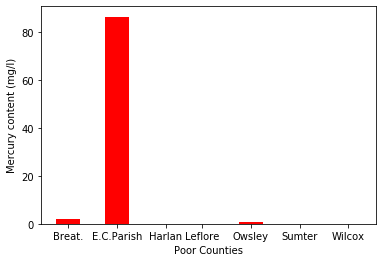

  poor counties  mercury level (mg/l)
0        Breat.              2.009475
1    E.C.Parish             86.333333
2        Harlan              0.020154
3       Leflore              0.000000
4        Owsley              0.776609
5        Sumter              0.031515
6        Wilcox              0.000000


In [93]:
# Graph and data chart to show mercury levels in poor cities

# Analysis: Mercury levels seem significantly low for the poorer areas except for E.C. Parish, which has the 
# highest mercury levels in the set. Mercury levels are lower than expected according to hypothesis.
plt.xlabel('Poor Counties') 
plt.ylabel('Mercury content (ng/l)') 

height = [10, 30, 50, 65, 85, 105, 125]
poor_name = ['Breat.', 'E.C.Parish', 'Harlan', 'Leflore', 'Owsley', 'Sumter', 'Wilcox']

plt.bar(height, poor_mercury_values, tick_label = poor_name, width = 10, color = ['red'])

plt.show() 
 
data = {"poor counties":poor_name, "mercury level (ng/l)":poor_mercury_values}
df = pd.DataFrame(data)
print(df)

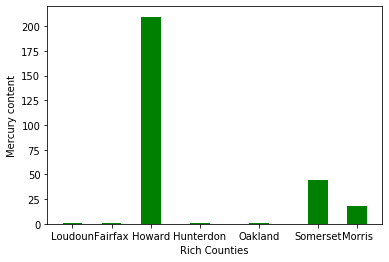

  rich counties  mercury level
0       Loudoun       1.289851
1       Fairfax       1.102033
2        Howard     209.584211
3     Hunterdon       1.102033
4       Oakland       1.152500
5      Somerset      44.011973
6        Morris      18.500668


In [79]:
# Graph and data chart to show mercury levels in rich cities

# Analysis: Mercury levels seem significantly high for high income areas, especially Howard, which has the 
# highest mercury levels in the set of poor and high income properties. Mercury levels are higher than expected 
# according to hypothesis.
plt.xlabel('Rich Counties') 
plt.ylabel('Mercury content (ng/l)')

height = [10, 30, 50, 75, 105, 135, 155]
rich_name = ['Loudoun', 'Fairfax', 'Howard', 'Hunterdon', 'Oakland', 'Somerset', 'Morris']

plt.bar(height, rich_mercury_values, tick_label = rich_name, width = 10, color = ['green'])

plt.show() 

data = {"rich counties":rich_name, "mercury level (ng/l)":rich_mercury_values}
df = pd.DataFrame(data)
print(df)

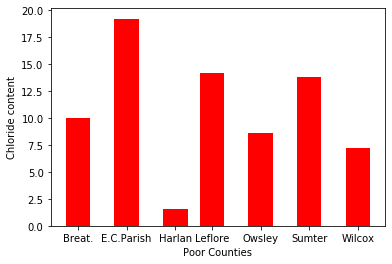

  poor counties  chloride level
0        Breat.        9.974956
1    E.C.Parish       19.236250
2        Harlan        1.526883
3       Leflore       14.231716
4        Owsley        8.583864
5        Sumter       13.797415
6        Wilcox        7.246503


In [80]:
# Graph and data chart to show chloride levels in poor cities

# Analysis: Chloride levels are significantly high for poor income areas, and do not vary significantly between 
# the poorer income areas. Chloride levels high, which is as expected according to hypothesis.
plt.xlabel('Poor Counties') 
plt.ylabel('Chloride content (mg/l)') 

height = [10, 30, 50, 65, 85, 105, 125]
poor_name = ['Breat.', 'E.C.Parish', 'Harlan', 'Leflore', 'Owsley', 'Sumter', 'Wilcox']

plt.bar(height, poor_chloride_values, tick_label = poor_name, width = 10, color = ['red'])

plt.show()

data = {"poor counties":poor_name, "chloride level (mg/l)":poor_chloride_values}
df = pd.DataFrame(data)
print(df)

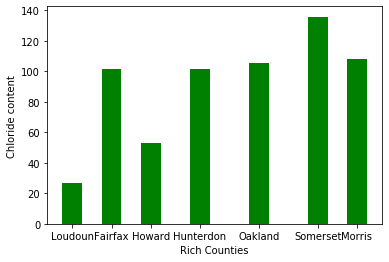

  rich counties  chloride level
0       Loudoun       26.804534
1       Fairfax      101.152963
2        Howard       52.653700
3     Hunterdon      101.152963
4       Oakland      105.151380
5      Somerset      135.731430
6        Morris      107.768808


In [81]:
# Graph and data chart to show chloride levels in rich cities

# Analysis: Chloride levels are significantly high for rich income areas, and do not vary significantly between 
# the other rich income areas. Chloride levels high, which is not expected according to hypothesis.
plt.xlabel('Rich Counties') 
plt.ylabel('Chloride content (mg/l)')

height = [10, 30, 50, 75, 105, 135, 155]
rich_name = ['Loudoun', 'Fairfax', 'Howard', 'Hunterdon', 'Oakland', 'Somerset', 'Morris']

plt.bar(height, rich_chloride_values, tick_label = rich_name, width = 10, color = ['green'])

plt.show() 

data = {"rich counties":rich_name, "chloride level (mg/l)":rich_chloride_values}
df = pd.DataFrame(data)
print(df)

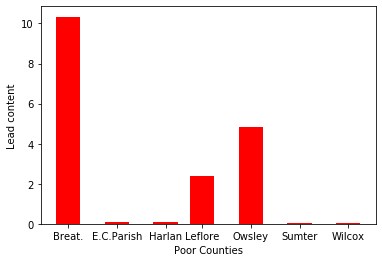

  poor counties  lead level
0        Breat.   10.336448
1    E.C.Parish    0.088333
2        Harlan    0.068647
3       Leflore    2.381000
4        Owsley    4.831553
5        Sumter    0.054825
6        Wilcox    0.039588


In [82]:
# Graph and data chart to show lead levels in poor cities

# Analysis: Lead levels are somewhat low for poorer income areas, but do not vary overall 
# much significantly for a poor income area. Lead levels are low, which is not expected according to hypothesis.
plt.xlabel('Poor Counties') 
plt.ylabel('Lead content (ug/l)') 

height = [10, 30, 50, 65, 85, 105, 125]
poor_name = ['Breat.', 'E.C.Parish', 'Harlan', 'Leflore', 'Owsley', 'Sumter', 'Wilcox']

plt.bar(height, poor_lead_values, tick_label = poor_name, width = 10, color = ['red'])

plt.show()

data = {"poor counties":poor_name, "lead level (ug/l)":poor_lead_values}
df = pd.DataFrame(data)
print(df) 

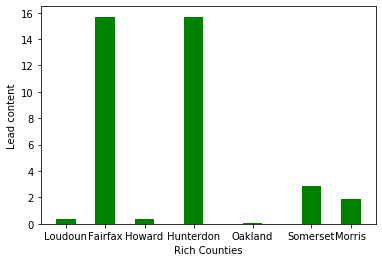

  rich counties  lead level
0       Loudoun    0.336051
1       Fairfax   15.694167
2        Howard    0.339500
3     Hunterdon   15.694167
4       Oakland    0.056861
5      Somerset    2.845363
6        Morris    1.894978


In [83]:
# Graph and data chart to show lead levels in rich cities

# Analysis: Lead levels are somewhat low for rich income areas
# Lead levels are low, which is expected according to hypothesis.
plt.xlabel('Rich Counties') 
plt.ylabel('Lead content (ug/l)')

height = [10, 30, 50, 75, 105, 135, 155]
rich_name = ['Loudoun', 'Fairfax', 'Howard', 'Hunterdon', 'Oakland', 'Somerset', 'Morris']

plt.bar(height, rich_lead_values, tick_label = rich_name, width = 10, color = ['green'])

plt.show() 

data = {"rich counties":rich_name, "lead level (ug/l)":rich_lead_values}
df = pd.DataFrame(data)
print(df)

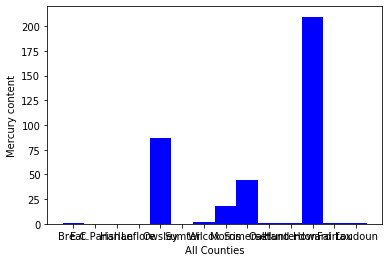

   all counties  mercury level
0        Breat.       4.831553
1    E.C.Parish       2.381000
2        Harlan       0.039588
3       Leflore       0.068647
4        Owsley       0.088333
5        Sumter       0.054825
6        Wilcox      10.336448
7        Morris       1.894978
8      Somerset       2.845363
9       Oakland       0.056861
10    Hunterdon      15.694167
11       Howard       0.339500
12      Fairfax      15.694167
13      Loudoun       0.336051


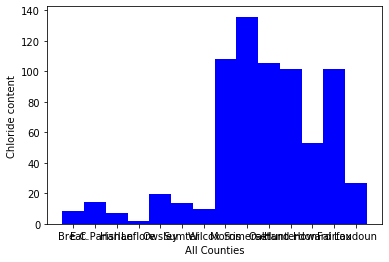

   all counties  chloride level
0        Breat.        8.583864
1    E.C.Parish       14.231716
2        Harlan        7.246503
3       Leflore        1.526883
4        Owsley       19.236250
5        Sumter       13.797415
6        Wilcox        9.974956
7        Morris      107.768808
8      Somerset      135.731430
9       Oakland      105.151380
10    Hunterdon      101.152963
11       Howard       52.653700
12      Fairfax      101.152963
13      Loudoun       26.804534


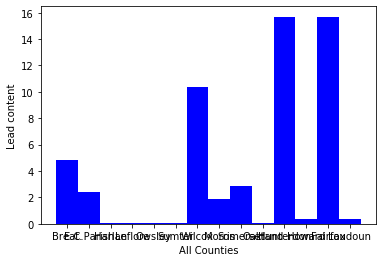

   all counties  lead level
0        Breat.    4.831553
1    E.C.Parish    2.381000
2        Harlan    0.039588
3       Leflore    0.068647
4        Owsley    0.088333
5        Sumter    0.054825
6        Wilcox   10.336448
7        Morris    1.894978
8      Somerset    2.845363
9       Oakland    0.056861
10    Hunterdon   15.694167
11       Howard    0.339500
12      Fairfax   15.694167
13      Loudoun    0.336051


In [88]:
# Graph contaminant levels from poorest city to richest city and display in a graph and data chart to summarize 
# the data from the individual statistics and take a look at how contaminant levels rise/fall from poor to rich 
# cities.

# Analysis: Overall, it seems as if the poor income areas have less contamination levels of the certain contaminants 
#           than the high income areas. 
chloride_values = []
mercury_values = []
lead_values = []


poor_to_rich = ["Owsley3Poorest.csv", "Leflore4Poorest.csv", "Wilcox5Poorest.csv", 
                "Harlan6Poorest.csv", "EastCarrollParish8Poorest.csv", "Sumter11Poorest.csv", "Breathitt14Poorest.csv", 
                "Morris10Richest.csv", "Somerset9Richest.csv", "Oakland7Richest.csv", "Hunterdon6Richest.csv", 
                "Howard5Richest.csv", "Fairfax3Richest.csv", "Loudoun1Richest.csv"]

for county in poor_to_rich:
    (chloride, mercury, lead) = findaverage_func(county)
    chloride_values.append(chloride)
    mercury_values.append(mercury)
    lead_values.append(lead)
    
# Mercury content graph and data
plt.xlabel('All Counties') 
plt.ylabel('Mercury content')

height = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
names_of_all = ['Breat.', 'E.C.Parish', 'Harlan', 'Leflore', 'Owsley', 'Sumter', 'Wilcox', 'Morris',
                'Somerset', 'Oakland', 'Hunterdon', 'Howard', 'Fairfax', 'Loudoun']

plt.bar(height, mercury_values, tick_label = names_of_all, width = 10, color = ['blue'])

plt.show() 

data = {"all counties": names_of_all, "mercury level":lead_values}
df = pd.DataFrame(data)
print(df)

# Chloride content graph and data
plt.xlabel('All Counties') 
plt.ylabel('Chloride content')

plt.bar(height, chloride_values, tick_label = names_of_all, width = 10, color = ['blue'])

plt.show() 

data = {"all counties": names_of_all, "chloride level":chloride_values}
df = pd.DataFrame(data)
print(df)

# Lead content graph and data
plt.xlabel('All Counties') 
plt.ylabel('Lead content')

plt.bar(height, lead_values, tick_label = names_of_all, width = 10, color = ['blue'])

plt.show() 

data = {"all counties": names_of_all, "lead level":lead_values}
df = pd.DataFrame(data)
print(df)

In [94]:
# Calculate kendall tau statistic for all three contaminants to determine the correlation between the average income
# in a county and the amount of the contaminant in the county. 


# Analysis: After the Tau statistic for the Mercury contaminant turned out to be 0.376, for the Chloride contaminant 
#           turned out to be 0.366, and for the Lead contaminant turned out to be 0.177, it does not match anywhere 
#           near a 1:1 correspondence that we expected to see with the decreasing amounts of contaminants when we sorted our counties 
#           from poorest to richest. This means that our results show that there isn't a difference between rich 
#           and poor income and contaminant levels. 

nums = [14, 13, 12, 11, 10, 9, 8, 7 ,6, 5 , 4 , 3, 2 , 1]

tau1, p_value1 = stats.kendalltau(nums, chloride_values)

tau2, p_value2 = stats.kendalltau(nums, mercury_values)

tau3, p_value3 = stats.kendalltau(nums, lead_values)

print ('')
print ('')

print( "KENDALL TAU VALUES FOR MERCURY, CHLORIDE, & LEAD:") 
print (tau1, tau2, tau3)

print ('')

print( "P_VALUES VALUES FOR MERCURY, CHLORIDE, & LEAD:") 
print (p_value1, p_value2, p_value3)



KENDALL TAU VALUES FOR MERCURY, CHLORIDE, & LEAD:
-0.37569634167468435 -0.3666893025074554 -0.17679827843514556

P_VALUES VALUES FOR MERCURY, CHLORIDE, & LEAD:
0.06230460877213063 0.06998308046248117 0.38035967995686015


# Ethics & Privacy

1. One of the most important responsibilities of the US government is to treat every one of its citizens fairly and equally, whether that be in the prosecution of the law or the allocation of resources. In such a capitalist environment, people are supposed to be given an unbiased start, with their talent and hard work determining where they will end up in life. As a result, it will be an ethical discrepancy if individuals from different parts of the US are not given access to the same quality of basic necessities, such as water, due to their income level.
2. During data collection, some of the biases we considered was the idea that we would find less or insufficient data from lower income or sparsely populated counties as there would be a lack of urgency for water quality testing in those areas.
3. The more affluent population has better access to cleaner water as they can have their own water supply or water purification systems installed in their homes, and we will not be able to extrapolate this data as we are only dealing with public water systems.
4. Certain areas might be prone to different contaminants due to geographic factors such as climate and weather, rather than human-created factors.


# Conclusion & Discussion

*    In conclusion, my data suggests that my original hypothesis was wrong, and that there is no correlation between the contaminants and the average income level of the counties. We can confidently say this as the Tau statistic for the Mercury contaminant turned out to be 0.376, for the Chloride contaminant turned out to be 0.366, and for the lead contaminant turned out to be 0.177. This does not match anywhere near a 1:1 correspondence that I expected to see with the decreasing amounts of contaminants when I sorted our counties from poorest to richest. 
	
    
*    Looking back at my research and data analysis, this could make sense as I only looked at three common contaminants to justify whether household income is a factor in poor water quality between different counties in the United States. However, my research falls short in the sense that I only investigated three contaminants, and there is a probability that poorer income areas might have less amounts of these contaminants, but a larger variety of other contaminants as compared to richer areas. Additionally, the hypothesis might be as such because of the fact that once a water providing service meets the EPA standards, there is little motivation for that service to improve its water quality past that standard as further filtering might seem unnecessary in regards to costs.